In [87]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [88]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [89]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

#55000x28x28x1 (because it's greyscale, if RGB would be x3)

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [90]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", \
                         kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="relu", padding="valid")

model = tf.keras.models.Sequential([
    # we don't have to flatten the images for conv layers
    my_conv_layer(5,10,padding="same",input_shape=[28,28,1]),
    my_conv_layer(5,10,padding="same",input_shape=[28,28,1]),
    my_conv_layer(5,10,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.AveragePooling2D(2),
    my_conv_layer(16,5),
    tf.keras.layers.AveragePooling2D(2),
    # flatten before reverting to dense layers
    tf.keras.layers.Flatten(),
    my_dense_layer(84),
    my_dense_layer(10, activation="softmax")
])

In [91]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=["accuracy"])

In [92]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 2495s 45ms/sample - loss: 0.8188 - accuracy: 0.7010 - val_loss: 0.5979 - val_accuracy: 0.7866
Epoch 2/5
55000/55000 [==============================] - 604s 11ms/sample - loss: 0.5819 - accuracy: 0.7885 - val_loss: 0.5240 - val_accuracy: 0.8148
Epoch 3/5
55000/55000 [==============================] - 326s 6ms/sample - loss: 0.5189 - accuracy: 0.8132 - val_loss: 0.4996 - val_accuracy: 0.8238
Epoch 4/5
55000/55000 [==============================] - 325s 6ms/sample - loss: 0.4823 - accuracy: 0.8278 - val_loss: 0.4687 - val_accuracy: 0.8332
Epoch 5/5
55000/55000 [==============================] - 327s 6ms/sample - loss: 0.4573 - accuracy: 0.8373 - val_loss: 0.4613 - val_accuracy: 0.8380


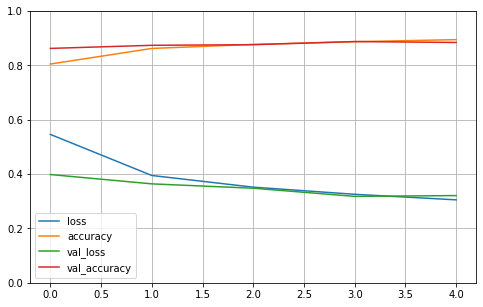

In [7]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [10]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[5402    0    3    6    0    6   13    1   10    3]
 [   0 6153    3    9    0    0    0   10    3    1]
 [   1    4 5438   15    1    0    0    9    1    1]
 [   0    0    7 5612    0    5    0    3    5    6]
 [   0    5    2    0 5253    0    7    1    2   37]
 [   1    1    0   46    1 4905   26    0    4    3]
 [   1    6    1    0    1    1 5404    0    3    0]
 [   0    7    5   15   14    1    0 5656    3   14]
 [   1   13    6   33    5    4    4    1 5308   14]
 [   5    3    1   19    9    7    1    9    2 5398]]


In [11]:
model.evaluate(X_test,y_test) 

10000/10000 [==============================] - 2s 221us/sample - loss: 0.0699 - accuracy: 0.9833


[0.06994416005015373, 0.9833]

In [8]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[ 972    0    1    1    0    1    1    0    2    2]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   1    3 1019    3    1    0    0    3    1    1]
 [   0    0    1 1005    0    0    0    1    0    3]
 [   0    0    4    1  964    0    2    2    0    9]
 [   1    0    0   23    1  863    1    1    0    2]
 [   8    3    1    1    4    4  935    0    2    0]
 [   1    4    8    4    0    0    0 1002    1    8]
 [   1    0    4    5    4    1    1    2  951    5]
 [   1    3    0    3   11    1    0    3    0  987]]


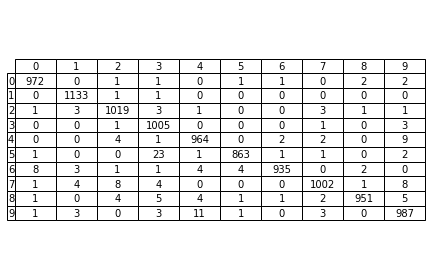

In [9]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat.pdf')